<a href="https://colab.research.google.com/github/tai/colab-tests/blob/main/mnist_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST on TFLite on Colab

In [ ]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.3.0'

In [9]:
# 画像データのロード
ret = np.load("mnist-test-100.npz")
x_test = ret['arr_0']
x_test.shape

(100, 28, 28, 1)

In [10]:
# TFliteモデルのロード
interpreter = tf.lite.Interpreter(model_path="mnist-model.tflite")
interpreter.allocate_tensors()

In [11]:
# モデルの入出力情報の取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'conv2d_input',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 28, 28,  1], dtype=int32),
  'shape_signature': array([-1, 28, 28,  1], dtype=int32),
  'sparsity_parameters': {}}]

In [12]:
# 画像をどれか１つ選ぶ
img = x_test[0].reshape((-1, 28, 28, 1))
img.shape

(1, 28, 28, 1)

In [13]:
# set input
interpreter.set_tensor(input_details[0]['index'], img.astype(np.float32))


In [14]:
# do inference
interpreter.invoke()

In [15]:
# get result
output_data = interpreter.get_tensor(output_details[0]['index'])

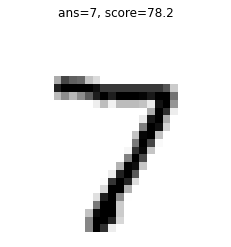

In [16]:
def show_result(img, data):
    answer = np.argmax(output_data[0])
    score = output_data[0][answer] * 100

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.axis('off')
    ax.title.set_fontsize(16)
    ax.set_title('ans={}, score={:.1f}'.format(answer, score))
    ax.imshow(img.reshape(28, 28), cmap=cm.gray_r)

show_result(img, output_data)